In [1]:
pip install pandas-datareader


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras.models

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install yahoofinance

Note: you may need to restart the kernel to use updated packages.


In [6]:
#import libbaries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas
from pandas_datareader import data as pdr
import yahoofinance as yfin
plt.style.use('fivethirtyeight')

In [7]:
df = pdr.get_data_yahoo("^DJI", start="2012-06-26", end="2022-06-26")
print(df)

                    High           Low          Open         Close     Volume  \
Date                                                                            
2012-06-26  12576.410156  12452.030273  12503.570312  12534.669922  109270000   
2012-06-27  12646.870117  12532.709961  12532.929688  12627.009766   97950000   
2012-06-28  12626.250000  12450.169922  12626.250000  12602.259766  125870000   
2012-06-29  12880.389648  12604.530273  12604.599609  12880.089844  191630000   
2012-07-02  12902.120117  12795.480469  12879.709961  12871.389648  109640000   
...                  ...           ...           ...           ...        ...   
2022-06-17  30167.519531  29653.289062  29912.699219  29888.779297  692830000   
2022-06-21  30653.980469  30074.689453  30074.689453  30530.250000  376900000   
2022-06-22  30777.919922  30166.009766  30352.570312  30483.130859  343490000   
2022-06-23  30715.630859  30293.400391  30570.330078  30677.359375  361420000   
2022-06-24  31517.289062  30

In [8]:
#get number of rows and columns
df.shape

(2516, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

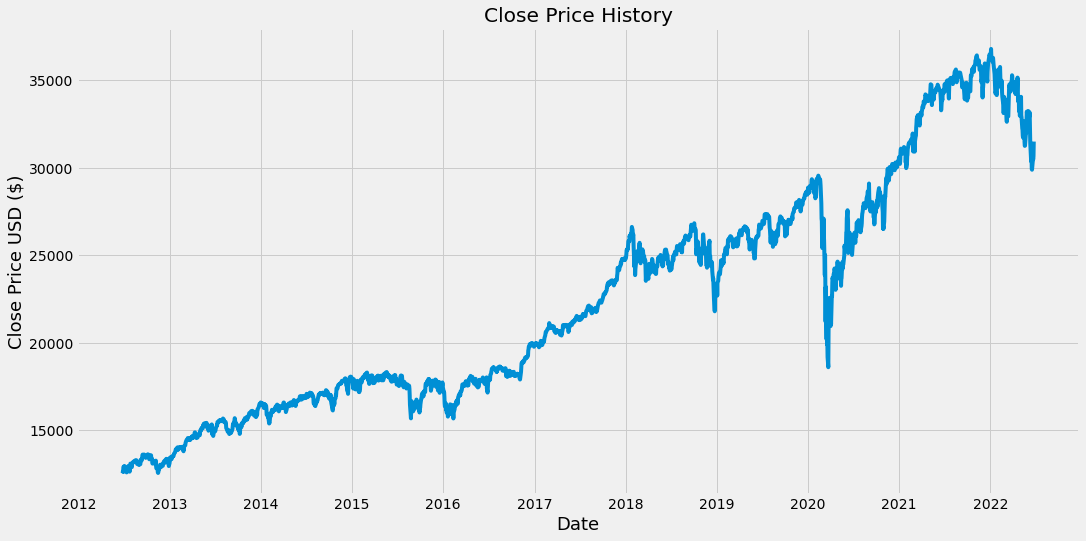

In [9]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

In [10]:
#Create a new DF with only close column
data=df.filter(['Close'])
#Convert the DF to a numpy array
dataset= data.values
#get the number of row to train our LSTM model
training_data_len= math.ceil(len(dataset)*.8)

training_data_len

2013

In [11]:
#Scale Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.00380548],
       [0.00278549],
       ...,
       [0.73968584],
       [0.74769032],
       [0.78162071]])

In [12]:
#create training data set 
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split data into x_train anf y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print (x_train)
        print(y_train)
        print()

[array([0.        , 0.00380548, 0.00278549, 0.01423533, 0.01387678,
       0.01685517, 0.01491862, 0.00980012, 0.0083091 , 0.00488153,
       0.00287906, 0.00159075, 0.00999053, 0.00793489, 0.01116301,
       0.01541441, 0.01684281, 0.01186485, 0.00769793, 0.00340616,
       0.0058265 , 0.01455842, 0.0222951 , 0.02218588, 0.01953473,
       0.0181933 , 0.01418546, 0.02314035, 0.0240198 , 0.02612529,
       0.02641543, 0.0259848 , 0.027747  , 0.0261595 , 0.02627118,
       0.02596789, 0.02948449, 0.03051848, 0.03037174, 0.0275669 ,
       0.02629674, 0.02154504, 0.02568722, 0.02431488, 0.02342142,
       0.02360647, 0.01920628, 0.02292068, 0.02065819, 0.02113377,
       0.03121083, 0.03181415, 0.02965674, 0.03250324, 0.03291491,
       0.04142556, 0.04363079, 0.04197118, 0.04244676, 0.04299571])]
[0.04377748634481493]

[array([0.        , 0.00380548, 0.00278549, 0.01423533, 0.01387678,
       0.01685517, 0.01491862, 0.00980012, 0.0083091 , 0.00488153,
       0.00287906, 0.00159075, 0.00

In [13]:
#convert x_train and y_train to numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
#reshape x train data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1953, 60, 1)

In [15]:
#build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
#train model
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
62/62 [==============================] - 6s 44ms/step - loss: 0.0081
Epoch 2/100
62/62 [==============================] - 3s 42ms/step - loss: 0.0013
Epoch 3/100
62/62 [==============================] - 3s 42ms/step - loss: 4.8314e-04
Epoch 4/100
62/62 [==============================] - 3s 42ms/step - loss: 4.6851e-04
Epoch 5/100
62/62 [==============================] - 3s 49ms/step - loss: 3.9661e-04
Epoch 6/100
62/62 [==============================] - 3s 43ms/step - loss: 4.0457e-04
Epoch 7/100
62/62 [==============================] - 3s 43ms/step - loss: 3.5545e-04
Epoch 8/100
62/62 [==============================] - 3s 42ms/step - loss: 3.4827e-04
Epoch 9/100
62/62 [==============================] - 3s 42ms/step - loss: 3.2063e-04
Epoch 10/100
62/62 [==============================] - 3s 42ms/step - loss: 2.7976e-04
Epoch 11/100
62/62 [==============================] - 3s 46ms/step - loss: 3.0461e-04
Epoch 12/100
62/62 [==============================] - 3s 42ms/step - lo

62/62 [==============================] - 3s 47ms/step - loss: 1.0253e-04
Epoch 97/100
62/62 [==============================] - 3s 50ms/step - loss: 1.1200e-04
Epoch 98/100
62/62 [==============================] - 3s 45ms/step - loss: 1.0811e-04
Epoch 99/100
62/62 [==============================] - 3s 45ms/step - loss: 1.1343e-04
Epoch 100/100
62/62 [==============================] - 3s 48ms/step - loss: 1.6588e-04


In [18]:
#create test data set
#create array with skill values from index 2543 to 3342
test_data = scaled_data[training_data_len - 60: , :]
#create thedata set x_tes and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [19]:
#conert the data to numpy array
x_test = np.array(x_test)

In [20]:
#reshape data
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 15ms/step


In [22]:
#get the root mean square error(RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2 )
rmse

174.03528827037772

<ipython-input-23-15c8d5b7fd06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid ['Predictions'] = predictions


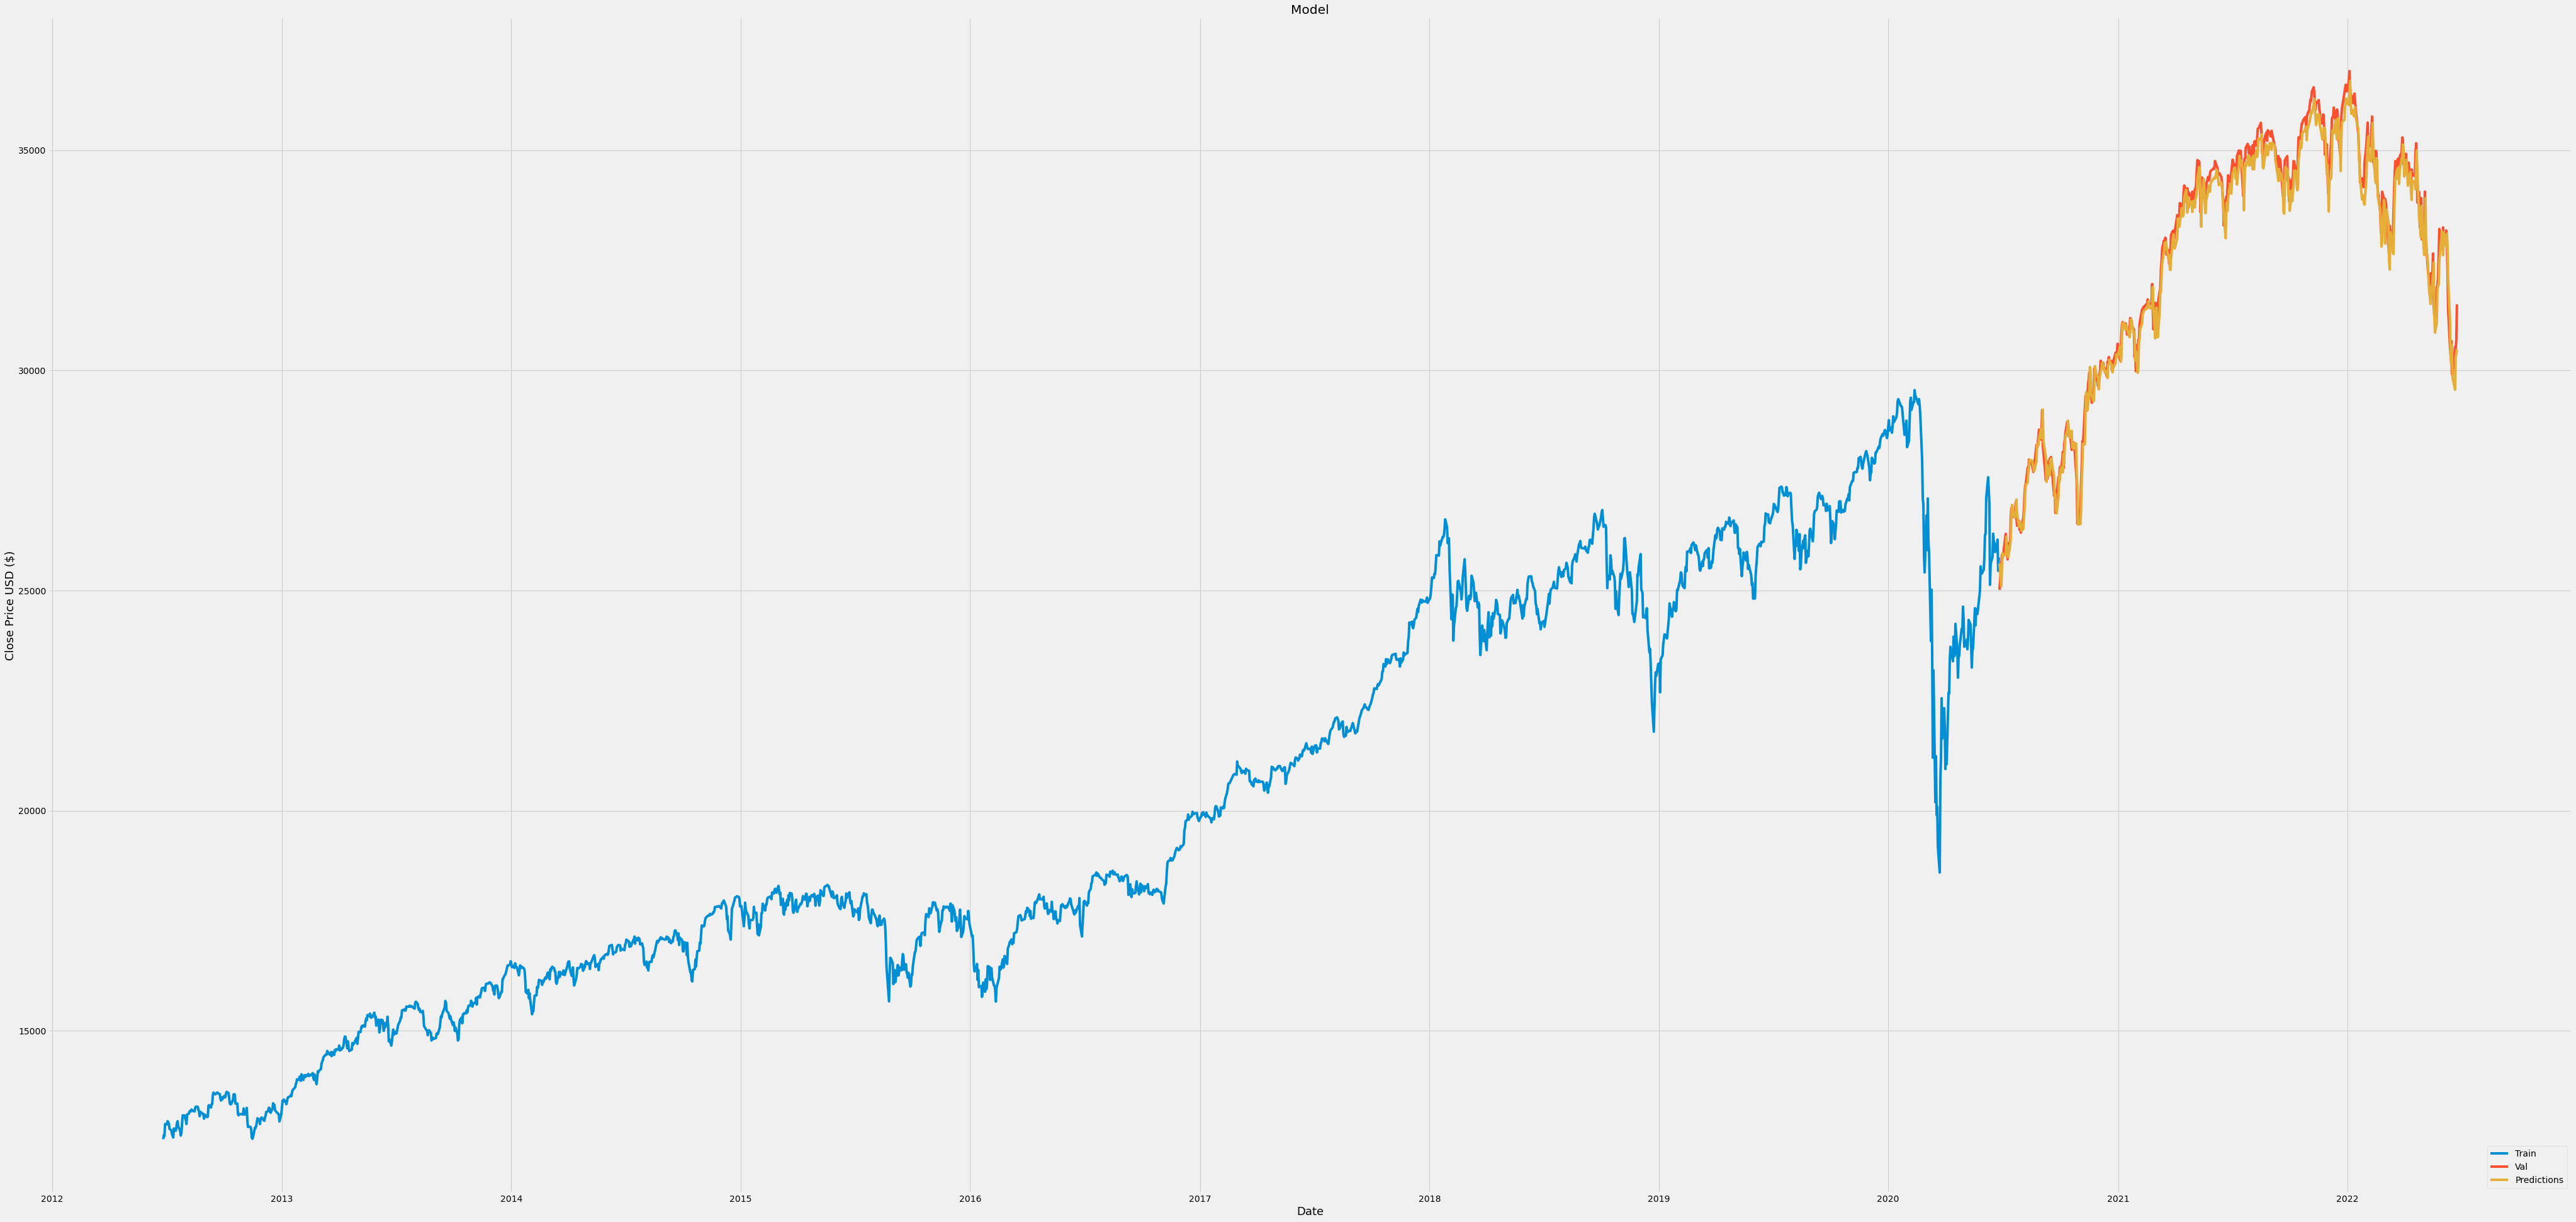

In [23]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid ['Predictions'] = predictions
#visualize the data
plt.figure(figsize = (64,32))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'] ,)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc= 'lower right')
plt.show()

In [24]:
#Show the actual price and predicted price
valid

,Close,Predictions
Date,,
2020-06-26,25015.550781,25612.892578
2020-06-29,25595.800781,25095.843750
2020-06-30,25812.880859,25464.544922
2020-07-01,25734.970703,25850.472656
2020-07-02,25827.359375,25808.707031
...,...,...
2022-06-17,29888.779297,29833.974609
2022-06-21,30530.250000,29560.748047
2022-06-22,30483.130859,30281.689453


In [28]:
#get the quote
US30_quote = web.DataReader('^DJI' , data_source='yahoo', start="2022-06-29", end="2022-06-29")
#create a new dataframe
new_df = US30_quote.filter(['Close'])
#Get the last 60 days close value and convert the df to a array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#Append the last 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to np array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 20ms/step
[[25732.357]]


In [30]:
#get the quote
US30_quote_22_06_29 = web.DataReader('^DJI' , data_source='yahoo', start="2022-06-29", end="2022-06-29")
print(US30_quote_22_06_29['Close'])

Date
2022-06-29    31029.310547
Name: Close, dtype: float64
